# 0. 들어가며

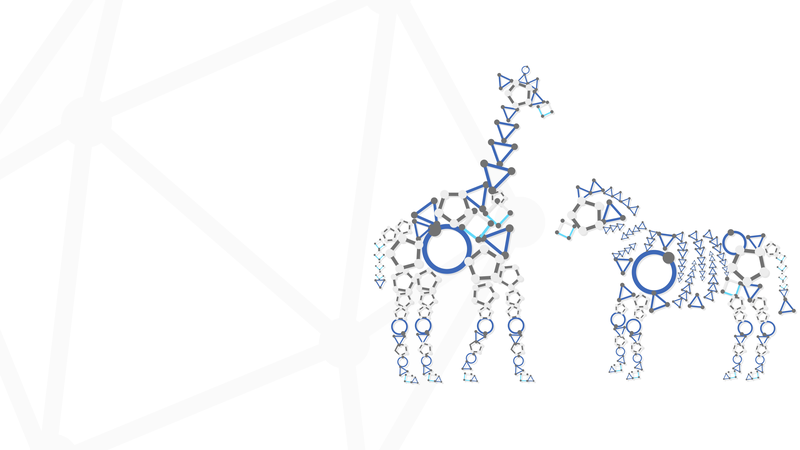

현재 많은 종류의 딥러닝 네트워크들이 있다. 이 중 몇 가지 Pre-trained Network는 Tensorflow나 PyTorch 등 프레임워크 차원에서 지원하고 있다.이 네트워크들은 딥러닝을 하다보면 자주 접하게 된다. 이번 시간에는 이들이 어떻게 생겨났고 어떤 시도로 만들어진 것인지 알아보자.

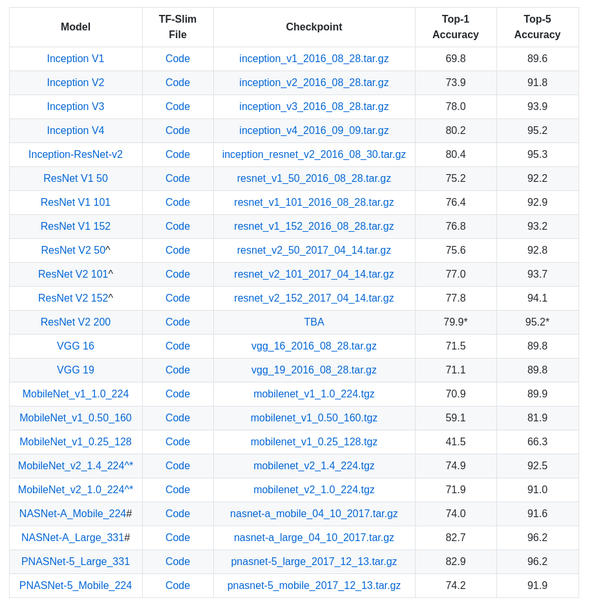

[Pre-trained 모델의 구조]


# 1. Aim

- 딥러닝 네트워크들을 동물원 구경하듯 둘러봅니다. (Model Zoo라고도 하죠)
- 딥러닝이 어떻게 시작된 것인지 알아봅니다.
- ResNet과 VGG는 무엇을 시도했는지 알아봅니다.

모델은 여기서 둘러볼 수 있다.

[TensorFlow-Slim image classification model library](https://github.com/tensorflow/models/tree/master/research/slim)

# 2. ImageNet Challenge

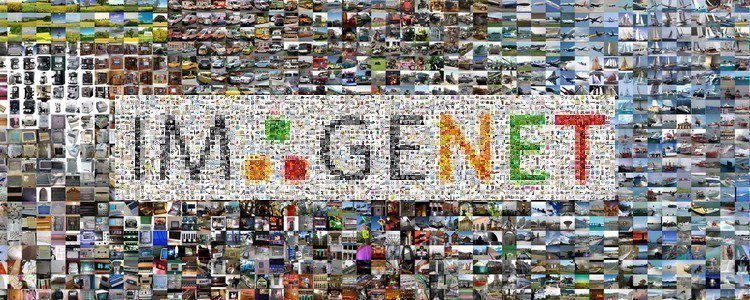 

[ImageNet Challenge]

`이미지넷(ImageNet)` 은 비전(vision) 관련 딥러닝을 하다 보면 필연적으로 마주치게 되는 이름이다. 이미지넷은 2010년 ILSVRC2010를 시작으로 대량의 이미지 데이터를 포함하는 데이터셋이다.  ILSVRC2010의 소개에 따르면, 이미지넷은 1만 개가 넘는 카테고리에 대해 100만 장 규모의 이미지를 가지고 있다고 한다.

2012년에는 Geoffrey Hinton 교수님이 이끄는 토론토 대학의 SuperVision팀이 오류율 16%로 1등을 달성했다. 이 팀은 어떤 방식을 써서 엄청난 결과를 달성했을까?
> top-5, top-1 error    
[bskyvision님의 top-5 error, top-1 error 설명](https://bskyvision.com/422)    
[Stackoverflow Evaluation & Calculate Top-N Accuracy: Top 1 and Top 5](https://stackoverflow.com/questions/37668902/evaluation-calculate-top-n-accuracy-top-1-and-top-5)    

> 페이페이 교수님의 TED  
[link](https://www.youtube.com/watch?v=40riCqvRoMs)


# 3. Start of Deep Network

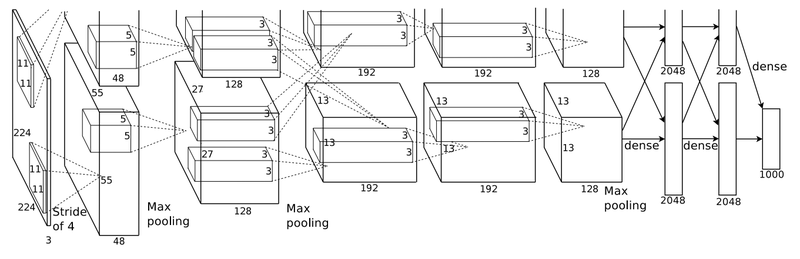

Supervision 팀의 1등 비법은 **네트워크를 깊게 쌓았던 것**이다.

위 그림에서 잘린 부분은 GPU 병렬 연산을 표현하기 위한 것이다. 여기에 더해진 것들은 ReLU 활성화 함수와 드롭아웃(Dropout) 그리고 오버래핑 풀링(Overlapping pooling) 등이 적용되었다고 한다.

[논문](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

[AlexNet구조](https://bskyvision.com/421)

# 4. CNN을 잘쓰자

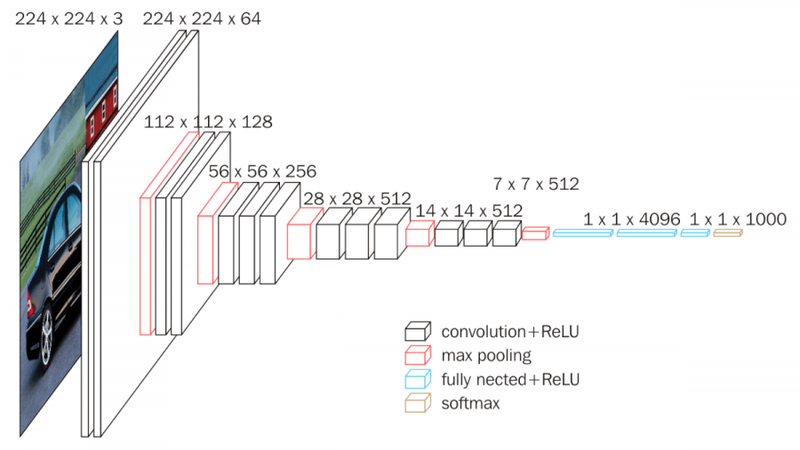

다음 알아볼 모델은 **VGG**이다. VGG는 AlexNet 같이 이미지넷 챌린지에서 공개된 모델이다. 2014년 준우승을 하였다.

VGG의 특징은 **간결한 구조로 많은 활용이 이뤄졌다는 점**이다. 이전에 우승한 네트워크들은 10개가 채 되지 않는 CNN층을 가진 반면, VGG16/VGG19는 16/19개 층으로 이뤄진다.

VGG는 어떤 방식으로 이런 레이어를 쌓았을까? CNN을 만들 때 우리는 kernel size를 조절한다. VGG에선 3x3 커널을 사용해서 더 많은 레이어를 쌓고 이미지의 비선형적 특성을 더 잡아내게 만들었다.

레이어가 많아지면 고려해야 할 게 연산량이다. 5x5와 7x7 레이어를 한 개 쌓으면 추가로 (5x5)x$C^2$/(7x7)x$C^2$번 연산을 해야 한다. 하지만 3x3 레이어가 N개가 있으면, Nx(3x3)x$C^2$개의 연산으로, 레이어가 3개더라도 5x5인 레이어 1개와 비슷한 연산수를 유지하게 된다.

[VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556.pdf)

[bskyvision - [CNN 알고리즘들] VGGNet의 구조 (VGG16)](https://bskyvision.com/504)

[라온피플 머신러닝 아카데미 GoogleNet](https://m.blog.naver.com/laonple/220686328027)

[ratsgo - CNN 주요 모델들](https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/)


# 5. Vanishing Gradient


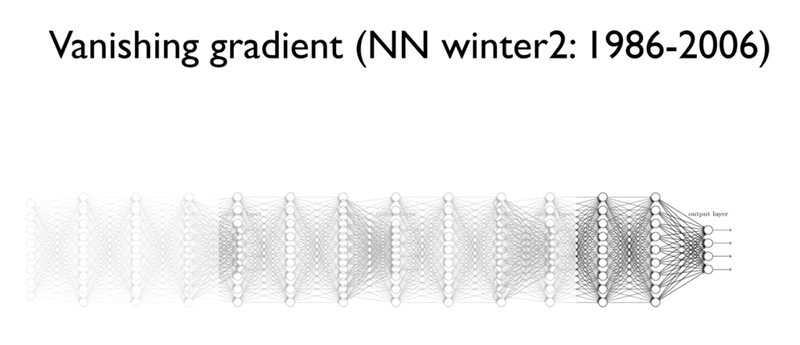

- [cbjsena - 경사소실 문제 해결](http://cbjsena.blogspot.com/2018/12/blog-post_25.html)

앞 내용을 보면 네트워크를 깊게 쌓는 게 그리 단순하진 않다는 걸 이해할 수 있다. 그 원인은 무엇일까??

우리의 네트워크는 Gradient descent를 통해서 기울기를 학습하는데 깊은 레이어에는 데이터에 따른 차이가 충분하게 반영되지 못한다. 이렇게 Gradient가 매우 작아져서 레이어를 학습시키기 위해 충분한 값을 표현하지 못할 경우를 Vanshing 했다고 하여 기울기 소실(경사소실, Vanishing Gradient) 이라고 한다.

Vanishing 또는 Exploding Gradient의 문제가 발생하는 원인은, 레이어가 깊어지면서 Gradient가 매우 커지거나 작아지기 때문이다. 레이어의 가중치가 반복돼서 곱해지면, 1보다 작을 때에는 0에 너무 가까워져 버리고, 1보다 클 때에는 그 값이 기하급수적으로 커지게 된다. 

[Andrew Ng 교수님의 Vanishing/Exploding Gradients 영상](https://youtu.be/qhXZsFVxGKo)

Vanishing Gradient 문제를 해결하기 위해서 ResNet은 skip connection이라는 방법을 도입했다. 이를 자세히 살펴보자.

# 6. Shortcut

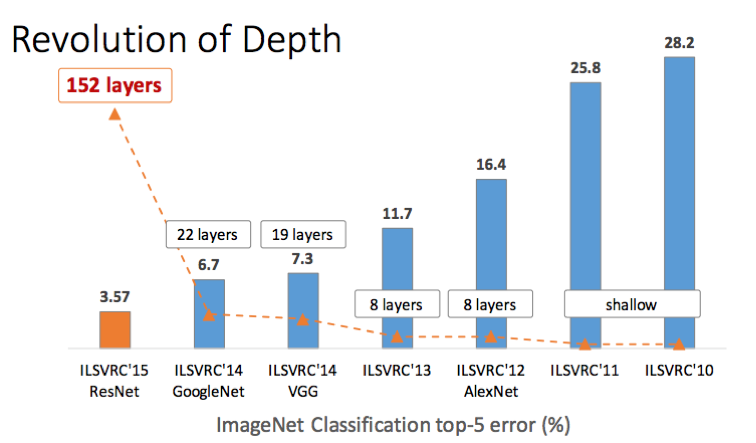

젤 왼쪽에 보이듯이, ResNet의 레이어 수는 무려 152개나 있다.

**ResNet은 어떤 방식으로 이렇게 레이어를 깊게 쌓았을까?**

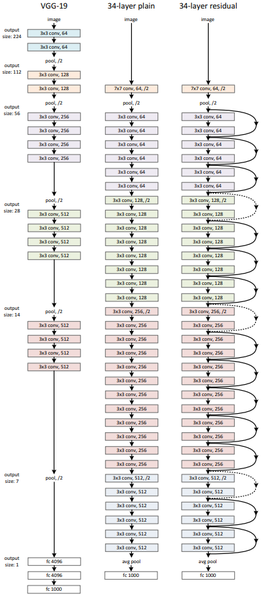

우측의 Residual Model에서 보이는 것처럼 **skip connection**이라는 구조를 사용하여 Vanishing Gradient 문제를 해결했다! skip connection은 레이어의 입력을 다른 곳에 이어서 Gradient가 깊게 이어지도록 하고, 결과적으로는 Vashing Gradient를 해결해준다.

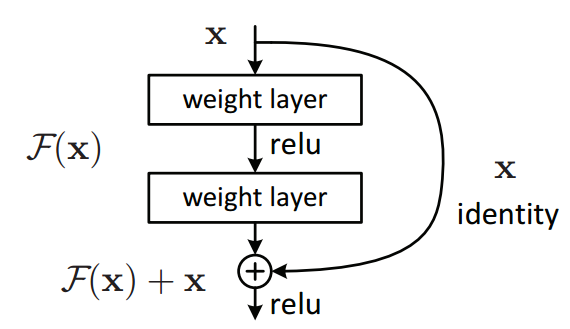

[Andrew Ng 교수님의 ResNet 설명](https://youtu.be/ZILIbUvp5lk)

# 7. 모델 둘러보기

지금까지 딥네트워크들이 어떤 이유에서 어떤 구조를 갖게 되었는지 확인해보았다. 이제 직접 모델을 만들어보는 대신, 우리가 봐온 모델이 Tensorflow의 model API와 Keras에서 어떻게 구현되어 있는지 모델 구조와 비교하며 코드를 확인하자.

**실습목표**
- 그림과 글로만 보던 딥네트워크 어떻게 만들고 있는지 알아봅니다.
- 논문의 방법이 사용된 부분을 코드에서 찾을 수 있습니다.
- 나도 할 수 있다는 자신감을 챙깁니다.

## 1) Model API
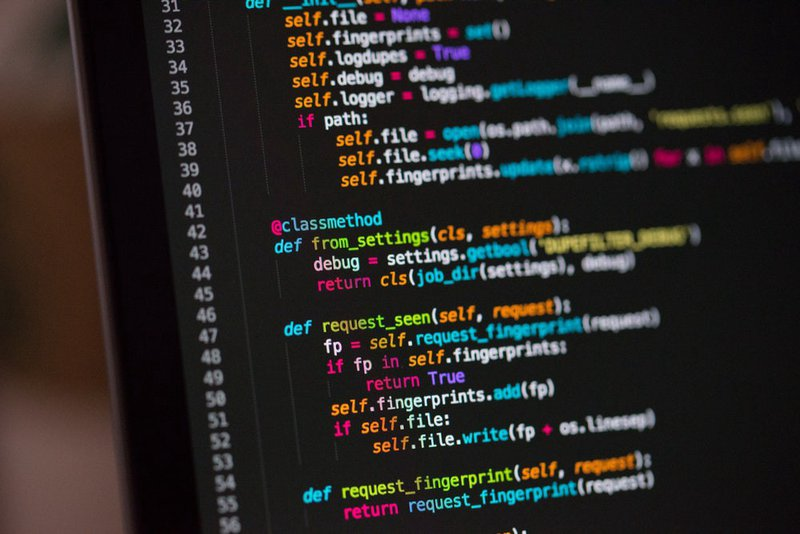

초기 Tensorflow와 Keras는 포함관계가 없었다. Tensorflow를 편하게 사용하게 만든 것이 Keras였지만 Tensorflow말고도 다른 인공지능 라이브러리를 편하게 사용할 수 있도록 만들었었다. 이후 Keras 창시자인 프랑소아 숄레가 구글에 합류한 후, Tensorflow 2.0부터는 본격적으로 Keras를 직접 지원하면서 Tensorflow가 Keras를 포함한 형태를 보이게 되었다.

[Keras-Wikipedia](https://en.wikipedia.org/wiki/Keras)

[프랑소아 숄레](https://brunch.co.kr/@hvnpoet/93)

### (1) Tensorflow
Tensorflow의 pre-trained model들을 slim이라는 고수준 API로 구현되어 있다.

[Tensorflow models repository](https://github.com/tensorflow/models)에서 구현된 모델들을 확인할 수 있다.

### (2) Keras
Keras는 Keras applications를 통해 사전학습 모델을 제공한다.

[Keras applications docs](https://www.tensorflow.org/api_docs/python/tf/keras/applications)에서 어떤 모델을 지원하는지 확인이 가능하다. 그리고 [Keras applications](https://github.com/keras-team/keras-applications)에서 구현된 코드를 확인할 수 있다.

>참고: 공부를 위해 직접 구현하거나 특정 부분을 수정할 때, 공식 문서를 읽는 것보다 코드를 직접 읽는 게 이해가 빠를 때도 있다.

## 2) VGG-16
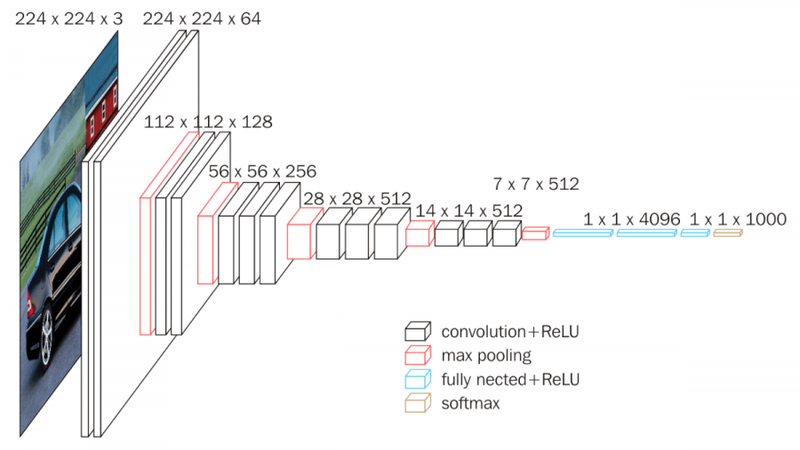

`VGG16`은 Maxpooling과 softmax 등의 Activation function을 제외하고, CNN과 Fully Connected Layer를 합쳐 16개 레이어로 구성되어 있다.

이번에는 cifar100 dataset을 받아서 모델을 VGG로 사용해보자.

[Keras VGG16 코드 구현 소스코드](https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 50000 x_test: 10000


In [7]:
img_input = keras.Input(shape=(32, 32, 3))

# 첫번째 블록
x = layers.Conv2D(64, (3, 3),activation='relu',padding='same',name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),activation='relu',padding='same',name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# 두 번째 블록
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv1')(x)
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# 세 번째 블록
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv1')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv2')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3pool')(x)

# 네 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4pool')(x)

# 다섯 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5pool')(x)

# 여섯 번째 블록
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x)    # CIFAR100을 위한 모델 Output

model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2conv1 (Conv2D)         (None, 16, 16, 128)       73856     
_________________________________________________________________
block2conv2 (Conv2D)         (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0    

In [8]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 75s 29ms/step - loss: 4.6062 - accuracy: 0.0086


## ResNet-50

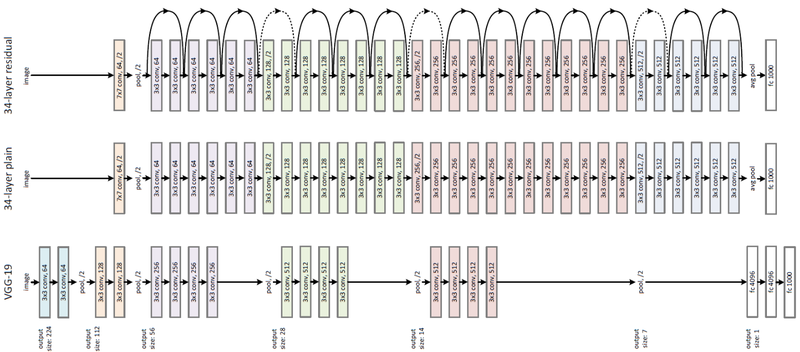

이번엔 Skip connction이 추가된 `ResNet`이다. Residual Block은 어떻게 구현되어 있을지, 레이어 수가 많아졌는데 이전 VGG와는 어떤 점이 다른지 살펴보자.

`ResNet` 사진의 구조를 보면 색깔이 다른 블록들이 있다. 이는 블록마다 feature의 크기가 서로 다르기 때문이다. 이렇게 크게 4개의 Stage로 구분해서 생각할 수 있다. 한 Stage 내에서는 kernel size/channel 수는 동일하다. 따라서, 이런 블록들은 일일이 하나씩 짜지 않고 블록 단위로 생성한다.

[ Keras ResNet50 코드 구현 소스코드](https://git.dst.etit.tu-chemnitz.de/external/tf-models/-/blob/1d057dfc32f515a63ab1e23fd72052ab2a954952/official/vision/image_classification/resnet_model.py)로부터 모델 구현부분을 가져와보자.

코드를 분석해보면 `conv_block`과 `identity_block`이 반복적으로 활용되어 모델을 생성하고 있다.

In [9]:
# 추가로 import해야 할 패키지들을 먼저 가져옵니다. 
from tensorflow.keras import backend, regularizers, initializers, models

# block 안에 반복적으로 활용되는 L2 regularizer를 선언해 줍니다.
def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
  return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None

print('Resnet50 GoGo!!')

Resnet50 GoGo!!


In [ ]:
# conv_block
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
  """A block that has a conv layer at shortcut.
  Note that from stage 3,
  the second conv layer at main path is with strides=(2, 2)
  And the shortcut should have strides=(2, 2) as well
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    strides: Strides for the second conv layer in the block.
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  shortcut = layers.Conv2D(
      filters3, (1, 1),
      strides=strides,
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '1')(
          input_tensor)
  shortcut = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '1')(
          shortcut)

  x = layers.add([x, shortcut])
  x = layers.Activation('relu')(x)
  return x


In [15]:
#identity block
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   batch_norm_decay=0.9,
                   batch_norm_epsilon=1e-5):
  """The identity block is the block that has no conv layer at shortcut.
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  x = layers.add([x, input_tensor])
  x = layers.Activation('relu')(x)
  return x

이제 `resnet50()`함수를 가져오자.

>주의! resnet50 모델을 생성하는 함수 안에 Imagenet 데이터셋에 해당하는 input shape가 224x224x3으로 선언되어 있다. 하지만 우리는 CIFAR100을 다루므로 이를 알맞게 바꾸어주어야 한다.(32x32x3)

In [12]:
#resnet50

def resnet50(num_classes,
             batch_size=None,
             use_l2_regularizer=True,
             rescale_inputs=False,
             batch_norm_decay=0.9,
             batch_norm_epsilon=1e-5):
  """Instantiates the ResNet50 architecture.
  Args:
    num_classes: `int` number of classes for image classification.
    batch_size: Size of the batches for each step.
    use_l2_regularizer: whether to use L2 regularizer on Conv/Dense layer.
    rescale_inputs: whether to rescale inputs from 0 to 1.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
      A Keras model instance.
  """

  input_shape = (32, 32, 3)  # CIFAR100을 위한 input_shape 조정입니다. 
  img_input = layers.Input(shape=input_shape, batch_size=batch_size)
  if rescale_inputs:
    # Hub image modules expect inputs in the range [0, 1]. This rescales these
    # inputs to the range expected by the trained model.
    x = layers.Lambda(
        lambda x: x * 255.0 - backend.constant(
            imagenet_preprocessing.CHANNEL_MEANS,
            shape=[1, 1, 3],
            dtype=x.dtype),
        name='rescale')(
            img_input)
  else:
    x = img_input

  if backend.image_data_format() == 'channels_first':
    x = layers.Permute((3, 1, 2))(x)
    bn_axis = 1
  else:  # channels_last
    bn_axis = 3

  block_config = dict(
      use_l2_regularizer=use_l2_regularizer,
      batch_norm_decay=batch_norm_decay,
      batch_norm_epsilon=batch_norm_epsilon)

  x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
  x = layers.Conv2D(
      64, (7, 7),
      strides=(2, 2),
      padding='valid',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='conv1')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name='bn_conv1')(
          x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

  x = conv_block(
      x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1), **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='b', **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='c', **block_config)

  x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='b', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='c', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='d', **block_config)

  x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f', **block_config)

  x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c', **block_config)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(
      num_classes,
      kernel_initializer=initializers.RandomNormal(stddev=0.01),
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='fc1000')(
          x)

  # A softmax that is followed by the model loss must be done cannot be done
  # in float16 due to numeric issues. So we pass dtype=float32.
  x = layers.Activation('softmax', dtype='float32')(x)

  # Create model.
  return models.Model(img_input, x, name='resnet50')

In [16]:
model = resnet50(num_classes=100)

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9408        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [17]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 73s 42ms/step - loss: 8.1608 - accuracy: 0.0852


매우 미세하지만 VGG-16보다 loss/accuracy가 개선된 것을 알 수 있따.

처음부터 안정되게 학습이 진행된다는 점 또한 ResNet 구조가 가지는 장점 중 하나이다.

위 부분에서 Skip connection은 다음 코드로 구현된다.

```python
#conv_block 내에서 구현

x = layers.add([x, shortcut])

#identity_block 내에서 구현

x = layers.add([x, input_tensor])

```